In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


def set_font_size(ax, font_size, legend_font_size=None):
    """Set fontsize of all axis text objects to specified value."""

    texts = ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels())

    for text in texts:
        text.set_fontsize(font_size)

    if legend_font_size is None:
        legend_font_size = font_size

    legend = ax.get_legend()

    if legend:
        for text in legend.get_texts():
            text.set_fontsize(legend_font_size)

In [2]:
def test_braid_func(b):
    fig, axs = plt.subplots(3, 1, figsize=(12, 9), tight_layout=True)
    
    # define base item vectors (level-0 compositions)
    s = np.linspace(-1, 1, 90)

    f_x_1 = np.exp(-(s**2)/(2*.2**2))
    f_x_0 = np.roll(f_x_1, -30)
    f_x_2 = np.roll(f_x_1, 30)
    
    # plot base item vectors
    axs[0].plot(s, f_x_0, c='r', lw=4)
    axs[0].plot(s, f_x_1, c='y', lw=4)
    axs[0].plot(s, f_x_2, c='b', lw=4)
    
    axs[0].set_title('X')
    axs[0].set_ylim(0, 1.5)
    axs[0].legend(['x_0', 'x_1', 'x_2'], loc=9, ncol=3)
    
    # construct level-1 compositions (pairings)
    f_y_0 = b(f_x_1, f_x_2)
    f_y_1 = b(f_x_0, f_x_2)
    f_y_2 = b(f_x_0, f_x_1)
    
    # plot level-one compositions
    axs[1].plot(s, f_y_0, c='r', lw=4)
    axs[1].plot(s, f_y_1, c='y', lw=4)
    axs[1].plot(s, f_y_2, c='b', lw=4)
    
    axs[1].set_title('Y')
    axs[1].set_ylim(0, 1.5)
    axs[1].legend(['y_0', 'y_1', 'y_2'], loc=9, ncol=3)
    
    # construct level-2 compositions
    f_z_0 = b(f_x_0, f_y_0)
    f_z_1 = b(f_x_1, f_y_1)
    f_z_2 = b(f_x_2, f_y_2)
    
    axs[2].plot(s, f_z_0, c='r', lw=4)
    axs[2].plot(s, f_z_1, c='y', lw=4)
    axs[2].plot(s, f_z_2, c='b', lw=4)
    
    axs[2].set_title('Z')
    axs[2].set_ylim(0, 1.5)
    axs[2].legend(['z_0', 'z_1', 'z_2'], loc=9, ncol=3)
    
    for ax in axs:
        ax.set_xlim(-1, 1)
        ax.set_xlabel('Neuron')
        ax.set_ylabel('Activity')
        set_font_size(ax, 16)
        
    # check for successful compositionality
    fig, axs = plt.subplots(2, 1, figsize=(12, 12), tight_layout=True)
    size = 300
    
    x_tick_labels = ['x_0', 'x_1', 'x_2', 'y_0', 'y_1', 'y_2', 'z_0', 'z_1', 'z_2']
    y_tick_labels = ['z_2', 'z_1', 'z_0', 'y_2', 'y_1', 'y_0']
    
    smty_fns = [np.dot, lambda x, y: np.exp(-np.linalg.norm((x - y)**2))]
    titles = ['Inner product', 'L2 distance']
    
    for ax, smty_fn, title in zip(axs, smty_fns, titles):
        
        ## plot truth
        for y_ctr in range(6):
            ax.axhline(y_ctr, color='gray', alpha=.4)
            ax.axhline(y_ctr + .5, color='gray', alpha=.4, ls='--')
            ax.scatter(range(9), y_ctr*np.ones(9), s=size/2, facecolors='w', edgecolors='k')

        ax.scatter([1, 2], [5, 5], c='k', s=size)  # y_0
        ax.scatter([0, 2], [4, 4], c='k', s=size)  # y_1
        ax.scatter([0, 1], [3, 3], c='k', s=size)  # y_2

        ax.scatter([0, 3], [2, 2], c='k', s=size)  # z_0
        ax.scatter([1, 4], [1, 1], c='k', s=size)  # z_1
        ax.scatter([2, 5], [0, 0], c='k', s=size)  # z_2

        ## compute and plot similarities
        all_fs = [f_x_0, f_x_1, f_x_2, f_y_0, f_y_1, f_y_2, f_z_0, f_z_1, f_z_2]
        
        for y_ctr, f_i in enumerate([f_z_2, f_z_1, f_z_0, f_y_2, f_y_1, f_y_0]):
            
            x_smty = -.5 + .5 * np.arange(19)
            smty = np.zeros(19)  # store similarity vals interleaved with zeros for cleaner plotting
            
            for x_ctr, f_j in enumerate(all_fs):
                idx = 2*x_ctr + 1  # idx to store f_i, f_j similarity
                smty[idx] = smty_fn(f_i, f_j)
            
            # set self similarity to nan
            smty[-2*(y_ctr+1)] = np.nan
                
            # normalize similarities to max
            smty *= (.5 / np.nanmax(smty))
 
            # plot
            ax.plot(x_smty, y_ctr + smty, lw=3, c='k')

        ax.set_xlim(-1, 9)
        ax.set_ylim(-1, 6)

        ax.set_xticks(range(9))
        ax.set_yticks(range(6))

        ax.set_xticklabels(x_tick_labels)
        ax.set_yticklabels(y_tick_labels)

        ax.set_title(title)

        set_font_size(ax, 16)

/home/melete/miniconda3/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


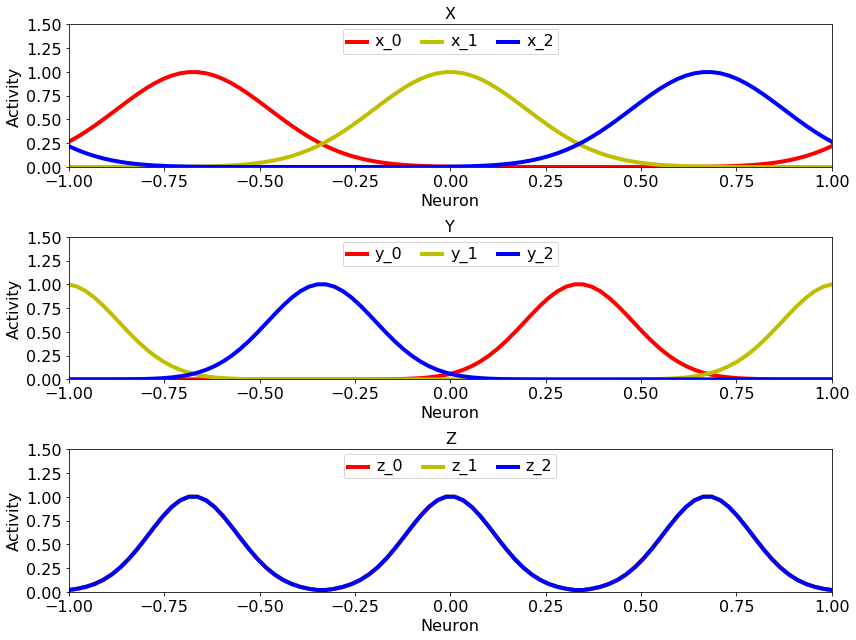

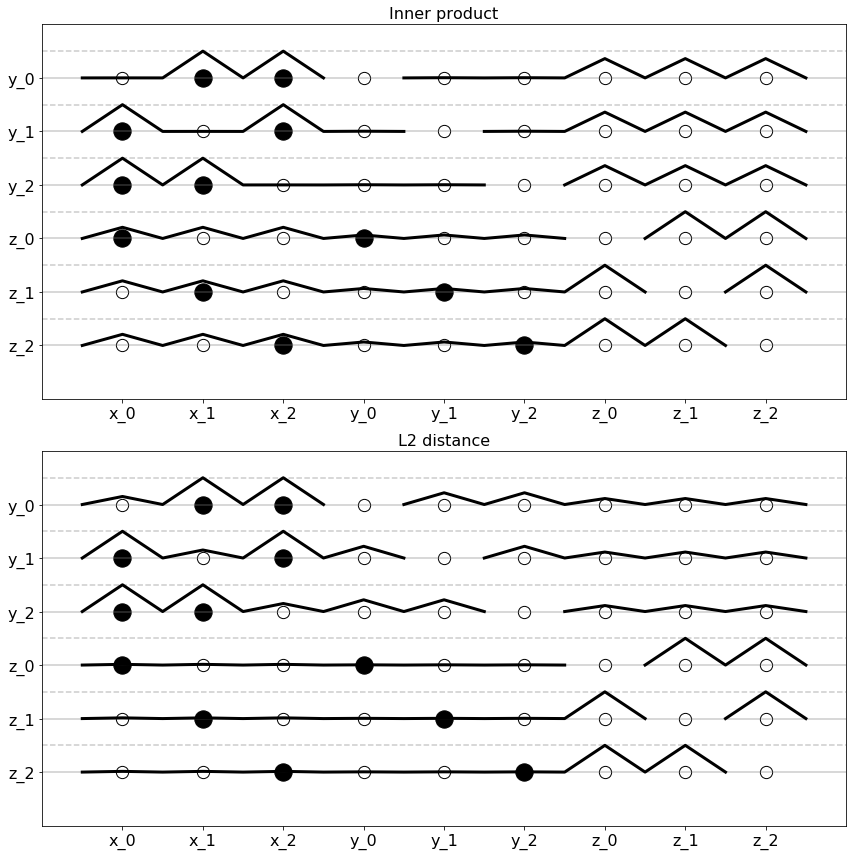

In [3]:
def b_0(f_i, f_j):
    tmp = f_i * f_j
    return tmp / tmp.max()

test_braid_func(b_0)